# Latihan Univariate Time Series

Univariate Time Series adalah serangkaian data yang direkam dalam interval waktu yang berurutan, di mana setiap titik data memiliki satu variabel yang diamati atau diukur. ini berarti bahwa dalam analisis univariate time series, kita hanya memperhatikan satu variabel dalam rentang waktu tertentu

## Import Liibrary

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Loading

In [4]:
# Load dataset langsung dari Google Drive
df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
# Mengecek missing value
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


karena ini merupaklan latihan univariate. kita akan menggunakan meantemp dan date sebagai interval waktunya

In [6]:
date = df['date'].values
temp = df['meantemp'].values

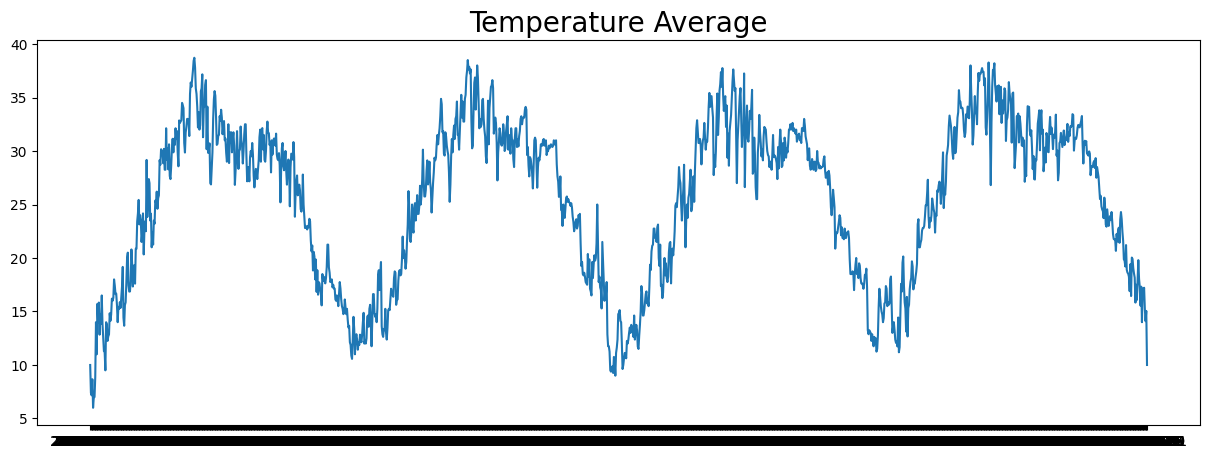

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(date, temp)
plt.title('Temperature Average',
          fontsize=20);

dapat dilihat bahwa data merupakan time series yang bersifat musiman karena memliki pola yang berualng pada interval tertentu

## Data Preprocessing

In [9]:
# windowing function
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [10]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)

## Modelling

untuk arsitektur model, gunakan dua buah layer LSTM. ketika menggunakan dua buah layer LSTM atau lebih, perhatikan bahwa seluruh layer sebelu, layer LSTM terakhir harus memilki parameter return_sequences yang bernilai True

In [11]:
model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(60, return_sequences=True),
      tf.keras.layers.LSTM(60),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1),
])

lalu pada optimizer, kita akan menggunakan parameter learning rate dan momentum seperti di bawah. kemudian salah satu loss function yang dapat dicoba untuk ini adalah Huber yang umum digunakan pada kasus time series. selain itu, metrik yang digunakan untuk mengevaluasi model adalah MAE

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 23.2158 - mae: 23.7158
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 23.0503 - mae: 23.5503
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 22.7916 - mae: 23.2916
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 21.9695 - mae: 22.4695
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 21.2250 - mae: 21.7250
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 20.4834 - mae: 20.9834
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 19.2963 - mae: 19.7963 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 17.6780 - mae: 18.1780
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 15.3279 - mae: 15.8270
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 12.2474 - mae: 12.7378
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 9.0147 - mae: 9.5024
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 6.6037 - mae: 7.0963
E

In [15]:
# Prediksi
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


array([[20.290697],
       [30.232285],
       [29.402193],
       ...,
       [15.328973],
       [13.115876],
       [12.295977]], dtype=float32)

# Latihan Multivariate Time Series

Multivariate Time Series adalah rangkaian data di mana setiap titik data terdiri dari beberapa variabel yang diamati atau diukur secara bersamaan dalam interval waktu yang berurutan. karena kita mengatai sejumlah variabel secara bersamaan, ini memungkinakan kita untuk memahami bagaimana variabel varianel tersebut berinteraksi satu sama lain seiring waktu

dengan kata lain, multivariate time series adalah cara untuk menganilisis dan memodelkan huubungan kompleks antar berbagai variabel dalam rentang waktu tertentu. ini memberikan insight yang lebih mendalam tentan dinamika sistem yang diamati, memungkinkan kita untuk melihat bagaimana dalam satu variabel dapat mempengaruhi variabel lainnya

## Data Loading

kita akan menggunakan sebuah dataset berisikan pengukuran konsumsi daya listrik di satu rumah dengan tingkat pengambilan sampel satu menit selama hampir dua tahun.

In [16]:
df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',',
                     infer_datetime_format=True, index_col='datetime', header=0)
df

<ipython-input-16-ab97bed3c6fe>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-02-14 17:19:00,0.636,0.140,241.16,2.6,0.0,0.0,0.0
2007-02-14 17:20:00,0.552,0.000,240.46,2.2,0.0,0.0,0.0
2007-02-14 17:21:00,0.538,0.000,239.74,2.2,0.0,0.0,0.0


## Data Preprocessing

In [17]:
# funsi untuk normalisasi
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data

data = df.values
data = normalize_series(data, data.min(axis=0), data.max(axis=0))

karena kasus ini merupakan multivariate time series di mana data yang kita gunakan memiliki lebih dari satu fitur, maka dari iru alangkah baiknya membuat sebuah fungsi yang dapat digunakan berulang kali.

In [23]:
# Agar tidak keliru menghitung jumlah fitur
N_FEATURES = len(df.columns)
print(f'Jumlah fitur: {N_FEATURES}')

Jumlah fitur: 7


In [20]:
# Data splitting. menetukan prporsi data berdasarkan  interval waktu yang sudah ditentukan
SPLIT_TIME = int(len(data) * 0.5)
x_train = data[:SPLIT_TIME]
x_valid = data[SPLIT_TIME:]

kode diatas membagi data menjadi dua bagian

In [21]:
# funsi windowing untuk multivariate time series
def windowed_dataset(series, batch_size, n_past, n_future, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True) # fungsi window yang digunakan di sini untuk membagi dataset menjadi jendela waktu
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future)) # fungsi flat map diugunakan untuk mengaplikasikan fungsi lambda ke setiap elemen jendela dalam dataset dan kemudian menggabungkan hasilnya.
    ds = ds.map(lambda w: (w[:n_past], w[n_past:])) # setiap batch dalam dataset sekarang berisi window yang berisikan n_past titik data waktu sebelumnya dan n_future titik data waktu setelahnya
    return ds.batch(batch_size).prefetch(1)


- n_past: jumlah waktu ke belakang yang akan dipertimbangkan sebagai input
- n_future: jumlah waktu ke depan yang akan dipertimbangkan sebagai output yang diinginkan
- shift: perndahan dalam jumlah waktu saat membuat jendela waktu

In [22]:
# membagi data latih dan data uji

BATCH_SIZE = 32
N_PAST = 24
N_FUTURE = 24
SHIFT = 1

# Kode untuk membuat windowed dataset
train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE, n_past=N_PAST, n_future=N_FUTURE, shift=SHIFT)
valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE, n_past=N_PAST, n_future=N_FUTURE, shift=SHIFT)

## Modeling

untuk arsitektur model, gunakan dua buah layer dense. perlu anda perhatikan layer pertama harus memiliki parameter input_shape sesuai dengan ukuran yang sudah kita tentukan sebelumnya yaitu (24, 7)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(N_PAST, N_FEATURES)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(N_FEATURES),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# membuat callbacks
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('mae') < 0.0557 and logs.get('val_mae') < 0.0557):
                self.model.stop_training = True

callbacks = myCallback()

In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mae',
                  optimizer= optimizer,
                  metrics=["mae"])

In [38]:
model.fit(train_set,
          validation_data=(valid_set),
          epochs=100,
          callbacks=callbacks,
          verbose=1
      )

Epoch 1/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0549 - mae: 0.0549 - val_loss: 0.0549 - val_mae: 0.0549


In [39]:
# prediksi
train_pred = model.predict(train_set)
train_pred[0][0]

1349/1349 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


array([ 0.358911  ,  0.23958382,  0.03129888,  0.35313064, -0.00635453,
        0.00100862,  0.85297936], dtype=float32)